In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Binary Classification (Breast Cancer)
breast_cancer = datasets.load_breast_cancer()

breast_cancer_features_raw = breast_cancer.data
breast_cancer_labels_raw = breast_cancer.target

# Multi-class Classification (Iris)
iris = datasets.load_iris()

iris_features_raw = iris.data
iris_labels_raw = iris.target

In [3]:
def breast_cancer_shuffle():
    breast_cancer = np.hstack((breast_cancer_features_raw, breast_cancer_labels_raw.reshape(-1, 1)))
    np.random.shuffle(breast_cancer)

    breast_cancer_features = breast_cancer[:, :-1]
    breast_cancer_labels = breast_cancer[:, -1].astype(int)

    #print(breast_cancer_features.shape)
    #print(breast_cancer_labels.shape)
    #print(breast_cancer.shape)

    return (breast_cancer_features, breast_cancer_labels)

def iris_shuffle():
    iris = np.hstack((iris_features_raw, iris_labels_raw.reshape(-1, 1)))
    np.random.shuffle(iris)

    iris_features = iris[:, :-1]
    iris_labels = iris[:, -1].astype(int)

    #print(iris_features.shape)
    #print(iris_labels.shape)
    #print(iris.shape)

    return (iris_features, iris_labels)
    

In [4]:
# Logistic Regression Function Defination (Binary Classification)

def sigmoid(x, w):
    return 1 / (1 + np.exp(-np.dot(x, w)))

def predict(x, w):
    return 1 if sigmoid(x, w) > 0.5 else 0

def logisitc_train():
    features, labels = breast_cancer_shuffle()

    w = np.random.rand(features.shape[1]+1)
    X = np.hstack((np.ones((features.shape[0], 1)), features))[:284]
    Y = labels.copy()[:284]

    test_X = np.hstack((np.ones((features.shape[0], 1)), features))[284:]
    test_Y = labels.copy()[284:]

    learning_rate = 0.0001
    iter_times = 200000

    for epoch in range(iter_times):
        grad = - (Y - sigmoid(X,w)).dot(X) / Y.shape[0]
        w = w - learning_rate * grad

    acc = np.mean([predict(test_X[i], w) == test_Y[i] for i in range(test_Y.shape[0])])
    print("accuracy: ", acc)

    return acc

In [5]:
# Logistic Regression Test

logisitc_acc_list = [logisitc_train() for _ in range(100)]

print("Average accuracy: ", np.mean(logisitc_acc_list))

accuracy:  0.9157894736842105
accuracy:  0.9157894736842105
accuracy:  0.9052631578947369
accuracy:  0.9473684210526315
accuracy:  0.9228070175438596
accuracy:  0.7263157894736842


C:\Users\94273\AppData\Local\Temp\ipykernel_43188\2902702699.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-np.dot(x, w)))


accuracy:  0.9192982456140351
accuracy:  0.887719298245614
accuracy:  0.9403508771929825
accuracy:  0.9333333333333333
accuracy:  0.9017543859649123
accuracy:  0.8912280701754386
accuracy:  0.9087719298245615
accuracy:  0.9263157894736842
accuracy:  0.9473684210526315
accuracy:  0.9298245614035088
accuracy:  0.9263157894736842
accuracy:  0.9052631578947369
accuracy:  0.9368421052631579
accuracy:  0.9333333333333333
accuracy:  0.8947368421052632
accuracy:  0.9368421052631579
accuracy:  0.8736842105263158
accuracy:  0.8982456140350877
accuracy:  0.9298245614035088
accuracy:  0.9157894736842105
accuracy:  0.9333333333333333
accuracy:  0.9228070175438596
accuracy:  0.9298245614035088
accuracy:  0.9087719298245615
accuracy:  0.9368421052631579
accuracy:  0.9438596491228071
accuracy:  0.8842105263157894
accuracy:  0.9473684210526315
accuracy:  0.8982456140350877
accuracy:  0.9228070175438596
accuracy:  0.9333333333333333
accuracy:  0.9157894736842105
accuracy:  0.9543859649122807
accuracy:  

In [7]:
# Softmax Regression Function Defination (Multi-class Classification)
def softmax(x, w):
    return np.exp(x.dot(w)) / np.exp(x.dot(w)).dot(np.ones((3, 1)))

def predict(x, w):
    return np.argmax(x.dot(w))

def softmax_train():
    features, labels = iris_shuffle()

    w = np.random.rand(features.shape[1]+1, 3)
    X = np.hstack((np.ones((features.shape[0], 1)), features))[:100]
    Y = labels.copy()[:100]

    test_X = np.hstack((np.ones((features.shape[0], 1)), features))[100:]
    test_Y = labels.copy()[100:]

    one_hot_Y = np.zeros((Y.shape[0], 3))
    for i in range(Y.shape[0]):
        one_hot_Y[i, Y[i]] = 1

    learning_rate = 0.0001
    iter_times = 200000

    for epoch in range(iter_times):
        grad = X.T.dot(softmax(X, w) - one_hot_Y) / Y.shape[0]
        w -= learning_rate * grad

    acc = np.mean([predict(test_X[i], w) == test_Y[i] for i in range(test_Y.shape[0])])
    print("accuracy: ", acc)

    return acc


In [8]:
#  Softmax Regression Test (Multi-class Classification)

softmax_acc_list = [softmax_train() for _ in range(100)]

print("Average accuracy: ", np.mean(softmax_acc_list))

accuracy:  0.96
accuracy:  0.96
accuracy:  1.0
accuracy:  0.96
accuracy:  0.98
accuracy:  0.98
accuracy:  0.98
accuracy:  0.94
accuracy:  0.98
accuracy:  1.0
accuracy:  0.96
accuracy:  0.94
accuracy:  0.94
accuracy:  0.96
accuracy:  0.98
accuracy:  0.96
accuracy:  0.98
accuracy:  0.96
accuracy:  0.94
accuracy:  0.98
accuracy:  0.96
accuracy:  0.94
accuracy:  0.98
accuracy:  1.0
accuracy:  0.98
accuracy:  0.94
accuracy:  0.94
accuracy:  0.96
accuracy:  0.96
accuracy:  0.98
accuracy:  0.98
accuracy:  0.96
accuracy:  0.98
accuracy:  0.98
accuracy:  0.94
accuracy:  0.94
accuracy:  0.96
accuracy:  0.94
accuracy:  0.92
accuracy:  0.94
accuracy:  1.0
accuracy:  0.94
accuracy:  0.98
accuracy:  0.98
accuracy:  0.96
accuracy:  0.94
accuracy:  1.0
accuracy:  0.88
accuracy:  0.96
accuracy:  0.94
accuracy:  0.98
accuracy:  0.96
accuracy:  0.94
accuracy:  0.96
accuracy:  1.0
accuracy:  0.98
accuracy:  1.0
accuracy:  0.96
accuracy:  0.96
accuracy:  0.86
accuracy:  0.98
accuracy:  0.94
accuracy:  0.94

In [9]:
# Perceptron Function Defination (Binary Classification)

def predict(x, w):
    return 1 if np.dot(x, w) > 0 else -1

def perceptron_train():
    features, labels = breast_cancer_shuffle()

    w = np.random.rand(features.shape[1]+1)
    X = np.hstack((np.ones((features.shape[0], 1)), features))[:284]
    Y = labels.copy()[:284]

    test_X = np.hstack((np.ones((features.shape[0], 1)), features))[284:]
    test_Y = labels.copy()[284:]

    Y[Y == 0] = -1
    test_Y[test_Y == 0] = -1

    learning_rate = 0.005
    iter_times = 2000000

    t = 0
    while t < iter_times:
        for i in range(Y.shape[0]):
            w = w if  Y[i]*np.dot(X[i], w) > 0 else w + learning_rate * Y[i] * X[i]
            t += 1

    acc = np.mean([predict(test_X[i], w) == test_Y[i] for i in range(test_Y.shape[0])])
    print("accuracy: ", acc)

    return acc

In [10]:
# Perceptron Test (Binary Classification)

perceptron_acc_list = [perceptron_train() for _ in range(100)]

print("Average accuracy: ", np.mean(perceptron_acc_list))

accuracy:  0.9333333333333333
accuracy:  0.9087719298245615
accuracy:  0.887719298245614
accuracy:  0.9052631578947369
accuracy:  0.9403508771929825
accuracy:  0.8736842105263158
accuracy:  0.8807017543859649
accuracy:  0.9298245614035088
accuracy:  0.9333333333333333
accuracy:  0.9228070175438596
accuracy:  0.8701754385964913
accuracy:  0.9052631578947369
accuracy:  0.9052631578947369
accuracy:  0.9263157894736842
accuracy:  0.8456140350877193
accuracy:  0.9333333333333333
accuracy:  0.9403508771929825
accuracy:  0.9192982456140351
accuracy:  0.9473684210526315
accuracy:  0.9192982456140351
accuracy:  0.7649122807017544
accuracy:  0.9122807017543859
accuracy:  0.8947368421052632
accuracy:  0.9333333333333333
accuracy:  0.8666666666666667
accuracy:  0.9333333333333333
accuracy:  0.9333333333333333
accuracy:  0.8947368421052632
accuracy:  0.9122807017543859
accuracy:  0.8350877192982457
accuracy:  0.9263157894736842
accuracy:  0.887719298245614
accuracy:  0.9263157894736842
accuracy:  0

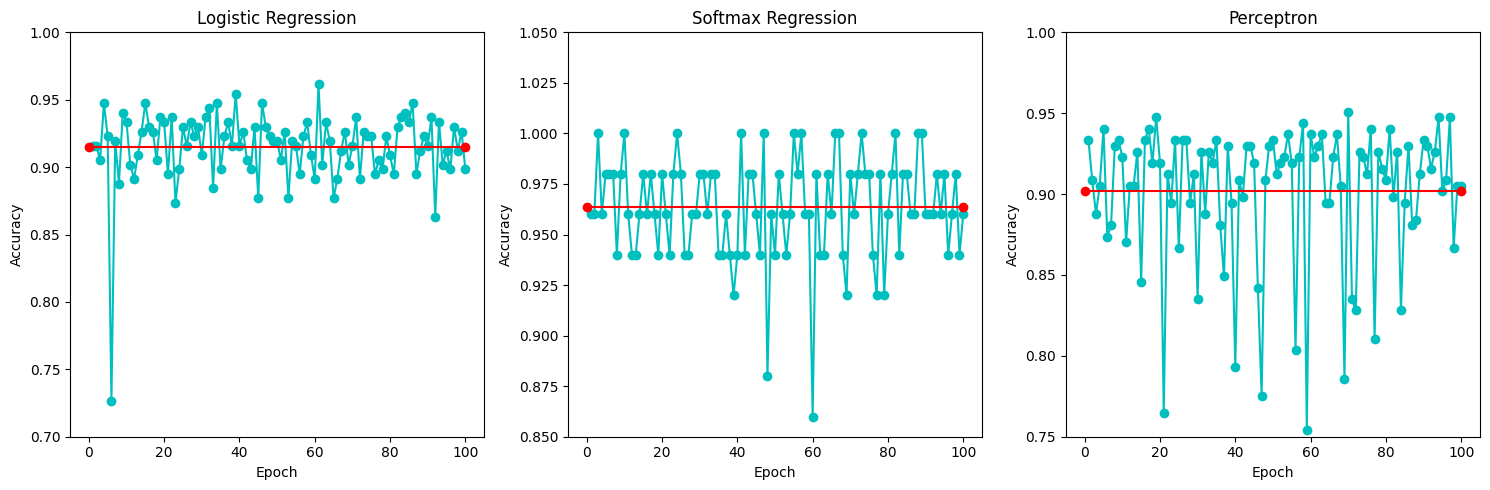

In [ ]:
average_logistic_acc = np.mean(logisitc_acc_list)
average_softmax_acc = np.mean(softmax_acc_list)
average_perceptron_acc = np.mean(perceptron_acc_list)

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Logistic Regression")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(range(1, 101), logisitc_acc_list, 'co-')
plt.plot([0, 100], [average_logistic_acc, average_logistic_acc], 'ro-')
plt.ylim(0.7, 1)
plt.subplot(1, 3, 2)
plt.title("Softmax Regression")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(range(1, 101), softmax_acc_list, 'co-')
plt.plot([0, 100], [average_softmax_acc, average_softmax_acc], 'ro-')
plt.ylim(0.85, 1.05)
plt.subplot(1, 3, 3)
plt.title("Perceptron")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(range(1, 101), perceptron_acc_list, 'co-')
plt.plot([0, 100], [average_perceptron_acc, average_perceptron_acc], 'ro-')
plt.ylim(0.75, 1)
plt.tight_layout()
plt.show()

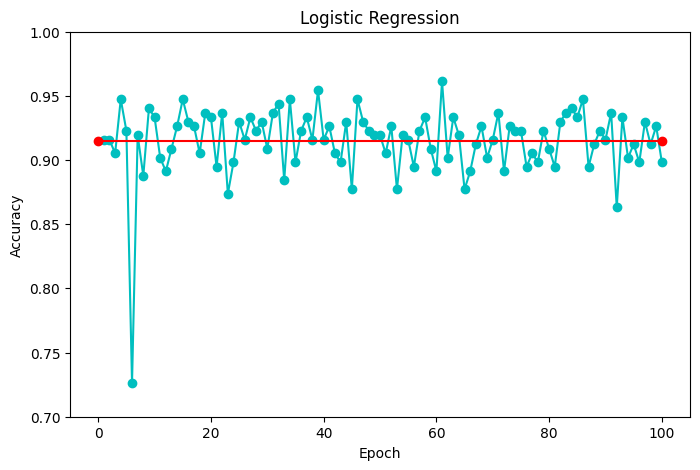

In [23]:
# Logistic single plot

plt.figure(figsize=(8, 5))
plt.title("Logistic Regression")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(range(1, 101), logisitc_acc_list, 'co-')
plt.plot([0, 100], [average_logistic_acc, average_logistic_acc], 'ro-')
plt.ylim(0.7, 1)
plt.show()

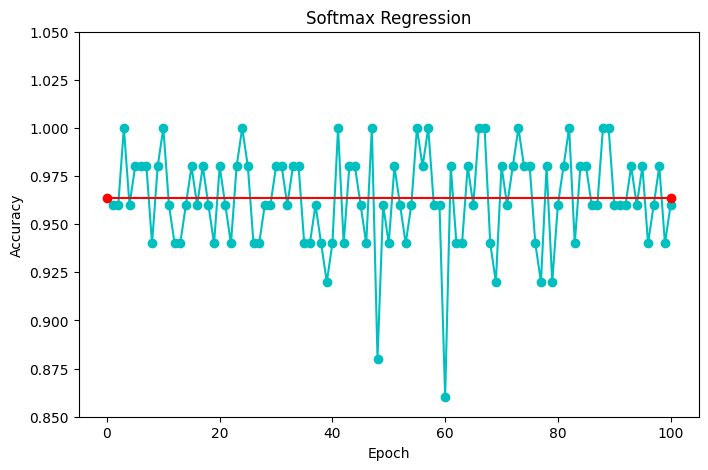

In [24]:
# Softmax single plot
plt.figure(figsize=(8, 5))
plt.title("Softmax Regression")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(range(1, 101), softmax_acc_list, 'co-')
plt.plot([0, 100], [average_softmax_acc, average_softmax_acc], 'ro-')
plt.ylim(0.85, 1.05)
plt.show()

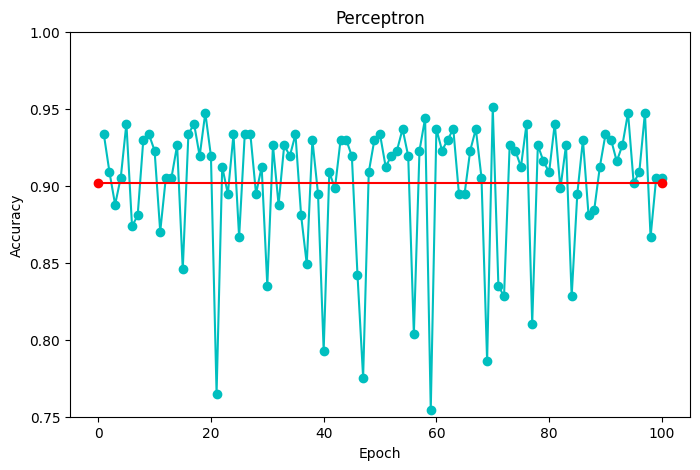

In [25]:
# Perceptron single plot

plt.figure(figsize=(8, 5))
plt.title("Perceptron")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.plot(range(1, 101), perceptron_acc_list, 'co-')
plt.plot([0, 100], [average_perceptron_acc, average_perceptron_acc], 'ro-')
plt.ylim(0.75, 1)
plt.show()